<a href="https://colab.research.google.com/github/JLuceroVasquez/pandas-conociendo-la-biblioteca/blob/main/inmuebles_cdmx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conociendo la biblioteca Pandas
Durante el curso se enseño a usar la biblioteca Pandas para la limpieza, manipulación, análisis exploratorio y visualización de datos. También se exploró las características de una base de datos, y enseño como lidiar con valores nulos, eliminar registros, crear columnas (numéricas y categóricas) y aplicar filtros. Para acceder a la documentación oficial de la biblioteca se puede hacer click [aquí](https://pandas.pydata.org/docs/).

Con fines didácticos, se aplicaron los conocimientos en un proyecto de clase. El proyecto consistió en brindar soporte a las demandas del equipo de Aprendizaje Automático y del equipo de Desarrollo de una empresa inmobiliaria de México.

La base de datos que vamos a utilizar para desarrollar el proyecto es una base de datos que contiene información sobre diferentes tipos de propiedades en Ciudad de México (CDMX), como departamentos, casas, locales comerciales, entre otros.

In [1]:
import pandas as pd

##Importando los datos
El primer paso para comenzar el proyecto es importar la base de datos y verificar algunas características generales de los datos


In [2]:
#Se asigna la dirección URL a una variable de alcance global.
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'

#Se cargan los datos en un dataframe de pandas, y especifica que el separador es un ";".
datos = pd.read_csv(url, sep=";")

In [3]:
'''
Con head() y tail() podemos visualizar respectivamente los primeros y los últimos 5 datos.
Si se desea visualizar una cantidad distinta se debe especificar dentro del paréntesis.
'''
datos.head()
datos.tail()

#Con sample() podemos visualizar n datos, escogidos aleatoriamente.
datos.sample(6)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
9739,Departamento,Santa Fe,2,1,1,72,6300.0,3122.0,654.5
23954,Cocineta,Coyoacán,1,0,1,30,22750.0,NaN,NaN
6052,Departamento,Santa Fe,4,4,4,240,59500.0,17500.0,7000.0
11827,Conjunto Comercial/Sala,Coyoacán,0,0,0,80,20300.0,3710.0,1050.0
18205,Departamento,Lomas de Chapultepec,2,1,0,64,12600.0,3055.5,721.0
18566,Departamento en Hotel,Santa Fe,1,1,1,65,8050.0,5467.0,1071.0


##Exploración de las características de los datos
* Cantidad de filas y columnas.
* Cuáles son las columnas de la base de datos.
* Explorar las diferentes columnas existentes.
* Verificar los tipos de datos.



In [4]:
#Cantidad de filas y columnas. Solo cuentan datos, omiten la columna de índices y la fila con los nombres de columnas.
datos.shape

(25121, 9)

In [5]:
#Columnas de la base de datos. Los nombres de las columnas se guardan en un objeto de Pandas tipo "pandas.core.indexes.base.Index".
columnas = datos.columns
columnas

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [6]:
#Tipo de datos y valores no nulos por columnas.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [7]:
#Exploración de 1 columna del dataframe.
datos['Tipo'].sample(5)

,Tipo
14675,Departamento
24,Conjunto Comercial/Sala
12754,Departamento
14667,Conjunto Comercial/Sala
21205,Departamento


In [8]:
#Exploración de 2 a más columnas del dataframe. Cuando son 2 o más, se debe pasar los nombres dentro de una lista.
datos[['Habitaciones', 'Valor']].sample(5)

,Habitaciones,Valor
754,2,4200.0
16086,0,3500.0
9424,1,2100.0
12486,0,7000.0
19089,2,26250.0


##Desafío aula 1
Para practicar los métodos aprendidos a lo largo de esta lección y aprender nuevos, realizaremos algunos análisis utilizando un archivo CSV diferente: alumnos.csv.

Importa el archivo alumnos.csv y almacena su contenido en un DataFrame de Pandas.

Visualiza las primeras 7 filas del DataFrame y las últimas 5.

Verifica la cantidad de filas y columnas en este DataFrame.

Explora las columnas del DataFrame y analiza los tipos de datos presentes en cada columna.

Extra: Calcula algunas estadísticas descriptivas básicas de los datos en el DataFrame (media, desviación estándar, etc.). Pista: busca el método "describe".

In [79]:
#Importamos el archivo csv
url_proyecto = 'https://gist.githubusercontent.com/ahcamachod/807a2c1cf6c19108b2b701ea1791ab45/raw/fb84f8b2d8917a89de26679eccdbc8f9c1d2e933/alumnos.csv'

proyecto = pd.read_csv(url_proyecto)

In [80]:
#Visualizamos las primeras 7 filas.
proyecto.head(7)

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,NaN,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,NaN,False
6,Daniela,21,7.0,True


In [11]:
#Visualizamos las últimas 5 filas.
proyecto.tail(5)

,Nombre,Edad,Nota,Aprobado
13,Miriam,25,9.0,True
14,Pablo,37,NaN,False
15,Milena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,Verdadero


In [12]:
#Analizamos los tipos de datos de cada columna.
proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nombre    18 non-null     object 
 1   Edad      18 non-null     int64  
 2   Nota      12 non-null     float64
 3   Aprobado  18 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 708.0+ bytes


In [13]:
#Calculo de estadísticas básicas.
proyecto.describe()

,Edad,Nota
count,18.000000,12.000000
mean,25.500000,6.841667
std,6.070662,2.264532
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


##Análisis exporatorio de los datos
Se respondieron dos preguntas:
* ¿Cuáles son los valores promedio de alquiler por tipo de propiedad?
* ¿Cuáles son los valores promedio de alquiler por tipo de propiedad residencial?
* ¿Cuál es el porcentaje de cada tipo de propiedad en nuestra base de datos?

###¿Cuáles son los valores promedio de alquiler por tipo de propiedad?

In [14]:
# Generamos una Serie cuyo índice es "Tipo" y los valores medios de "Valor"
serie_valores = datos.groupby("Tipo")["Valor"].mean()

# Ordenamos de forma ascendente
serie_valores_ordenada = serie_valores.sort_values(ascending=True)

# Convertimos la serie en un DataFrame con dos columnas: "Tipo" y "Valor"
df_tipo_valor = serie_valores_ordenada.reset_index()
df_tipo_valor

,Tipo,Valor
0,Cocineta,4425.856061
1,Posada/Chalé,5180.000000
2,Casa de Vecindad,5961.740506
3,Cochera/Estacionamiento,6995.454545
4,Estudio,8400.000000
5,Loft,9924.526316
6,Departamento en Hotel,16285.430769
7,Departamento,18683.269431
8,Casa,31453.177064
9,Tienda en Centro Comercial,32556.785714


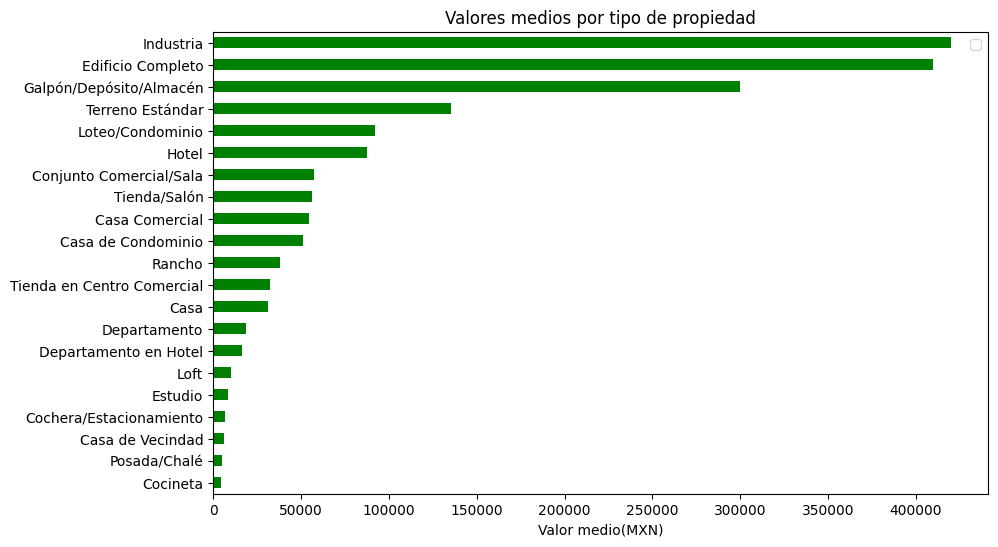

In [15]:
#Generamos un gráfico con el método plot que muestre los valores medios por tipo.
"""
Debido a que "Tipo" es columna y no índice, se debe especificar como valor en X del gráfico.
Con .set_ylabel y .legend() se quita el nombre del eje vertical y la leyenda para evitar redundancia.
"""
eje = df_tipo_valor.plot(x="Tipo", y="Valor",kind="barh", figsize=(10,6),
                   title="Valores medios por tipo de propiedad",
                   xlabel="Valor medio(MXN)",color="green")
eje.set_ylabel("")
eje.legend("")

###¿Cuáles son los valores promedio de alquiler por tipo de propiedad residencial?

In [16]:
#Se lista los valores únicos en la columna tipo
datos.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [17]:
#Se lista los tipos de edificios considerados comerciales
edificios_comerciales = ['Conjunto Comercial/Sala', 'Edificio Completo', 'Tienda/Salón', 'Casa Comercial', 'Terreno Estándar', 'Cochera/Estacionamiento', 'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Hotel', 'Loteo/Condominio', 'Industria']

In [18]:
#Se filtran los datos con el método query que no son corresponden a edificios comerciales.
datos_residencial = datos.query('@edificios_comerciales not in Tipo')
datos_residencial.sample(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
17991,Departamento,Coyoacán,1,1,0,40,8050.0,2275.0,91.0
4228,Departamento,Santa Fe,4,2,1,120,10500.0,5600.0,NaN
19843,Casa de Vecindad,Condesa,2,0,0,46,7000.0,NaN,NaN
24612,Departamento,Juárez,2,0,0,64,6300.0,2800.0,NaN
15501,Departamento,Bosques de las Lomas,4,2,1,164,17850.0,11490.5,NaN


In [19]:
#Se agrupan los datos por tipo de edificio y valor medio.
tiposresidencial_valor = datos_residencial.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
tiposresidencial_valor

,Valor
Tipo,
Cocineta,4425.856061
Posada/Chalé,5180.000000
Casa de Vecindad,5961.740506
Estudio,8400.000000
Loft,9924.526316
Departamento en Hotel,16285.430769
Departamento,18683.269431
Casa,31453.177064
Rancho,38014.375000


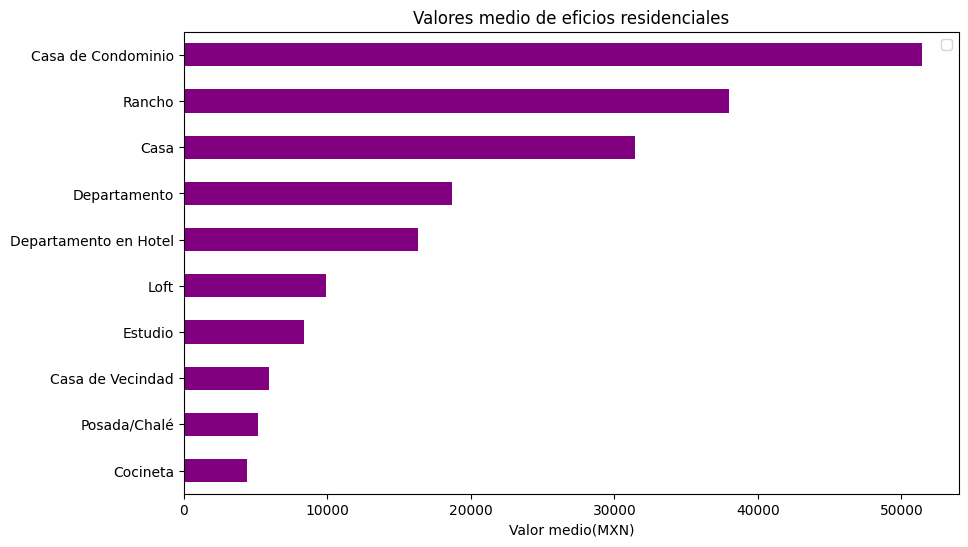

In [20]:
#Se genera un gráfico de barras con los valores medios de edificios residenciales.
eje_residencial_valor = tiposresidencial_valor.plot(kind='barh', figsize=(10,6),
                                              title = 'Valores medio de eficios residenciales',
                                              xlabel = 'Valor medio(MXN)', color='purple')
eje_residencial_valor.set_ylabel('')
eje_residencial_valor.legend('')

###¿Cuál es el porcentaje de cada tipo de propiedad en nuestra base de datos?

In [21]:
#Se realizó el conteo por tipo de edificio residencial, generando una serie de Pandas.
serie_tiporesidencial_conteo = datos_residencial.Tipo.value_counts()

#Se obtuvo el porcentaje por tipo de edificio residencia, con el parametro Normalize.
serie_tiporesidencial_porcentaje = datos_residencial.Tipo.value_counts(normalize=True)*100
serie_tiporesidencial_porcentaje

,proportion
Tipo,
Departamento,85.296666
Cocineta,4.194350
Casa de Condominio,3.524178
Casa,3.148651
Departamento en Hotel,2.628690
Casa de Vecindad,0.912820
Loft,0.219539
Rancho,0.046219
Estudio,0.023109


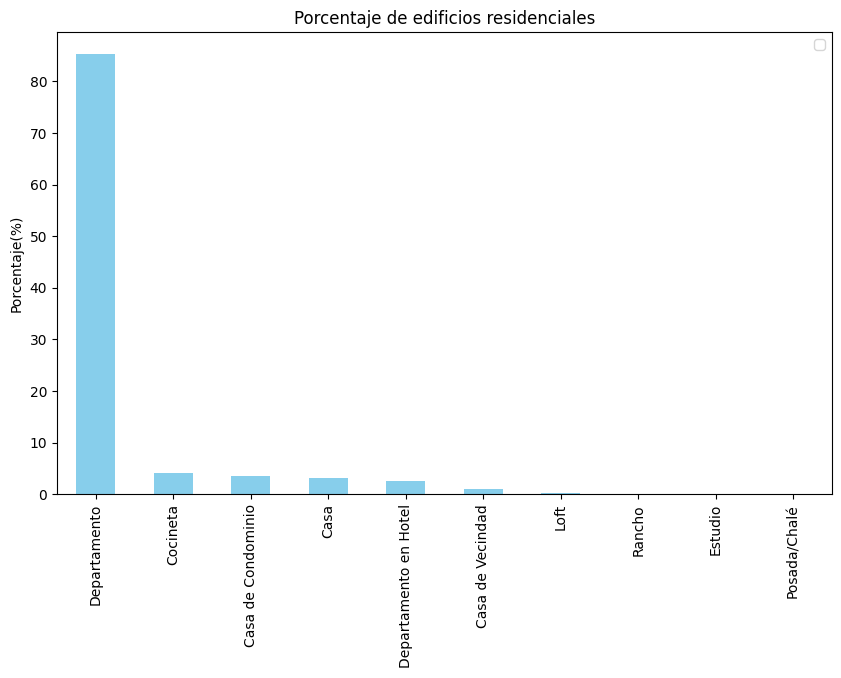

In [22]:
#Se convierte la serie en un dataframe para generar su gráfico.
df_tiporesidencial_porcentaje = serie_tiporesidencial_porcentaje.to_frame()

#Se grafica el porcentaje por tipo de edificio residencial en barras.
eje_residencial_porcentaje = df_tiporesidencial_porcentaje.plot(kind='bar',figsize=(10,6),
                                          title='Porcentaje de edificios residenciales',
                                          ylabel='Porcentaje(%)', color='skyblue')
eje_residencial_porcentaje.set_xlabel('')
eje_residencial_porcentaje.legend('')

###Filtramos los registros correspondientes al tipo "Departamento"
A solicitud del equipo de Machine Learning

In [50]:
#Filtramos los datos con query, escribiendo Deparamento entre dobles comillas porque la consulta se hizo en comillas simples.
'''
Con query creamos una vista modificada del dataframe original, no una copia. Por
lo cual, se realizó una copia explícita con .copy(). Esto permite, más adelante,
usar el parámetro 'inplace' para modificar el dataframe copiado. Si, en cambio,
se modifica una vista, Pandas no puede asegurar que el dataframe deseado haya sido
modificado.
'''
datos_departamento = datos_residencial.query('Tipo == "Departamento"').copy()
datos_departamento.sample(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
15747,Departamento,Condesa,1,0,0,65,7700.0,2275.0,455.0
10747,Departamento,Santa Fe,2,1,1,72,5600.0,4060.0,266.0
23751,Departamento,Condesa,3,0,0,92,6650.0,4851.0,388.5
9126,Departamento,Coyoacán,3,1,1,150,21000.0,5950.0,2068.5
20384,Departamento,Lomas de Chapultepec,4,2,2,380,70000.0,16800.0,3500.0


##Desafío del aula 2
El equipo de ML ha llegado con algunas demandas de última hora que debemos resolver en este momento de análisis exploratorio. Estas demandas son las siguientes:

1. Calcular el promedio de habitaciones por departamento.

2. Verificar cuántas colonias únicas existen en nuestra base de datos.

3. Analizar qué colonias tienen el promedio de alquiler más alto.

4. Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.

###Calcular el promedio de habitaciones por departamento

In [51]:
#Se calcula la media de habitaciones para los departamentos del df "datos_departamento".
datos_departamento.Habitaciones.mean()

np.float64(2.5041994039555675)

###Verificar cuántas colonias únicas existen en nuestra base de datos

In [52]:
#Se obtiene el array de numpay con los valores únicos de la columna "Colonias" del df "datos".
array_colonias = datos.Colonia.unique()
type(array_colonias)

numpy.ndarray

In [53]:
#Importamos la biblioteca numpay, para emplear el método size().
import numpy as np
np.size(array_colonias)

88

###Analizar qué colonias tienen el promedio de alquiler más alto

In [54]:
#Se agrupa el valor medio por Colonia, y ordena los datos en forma descendente.
serie_colonia_valor = datos.groupby('Colonia')['Valor'].mean().sort_values(ascending=False)

#Convertimos la serie en un dataframe con el método .to_frame().
df_colonia_valor = serie_colonia_valor.to_frame()

df_colonia_valor = df_colonia_valor.head() #Limitamos a los 5 valores más altos.
df_colonia_valor

,Valor
Colonia,
San Juan Xalpa,420926.739130
Nativitas,244684.395062
La Merced,213292.770833
Santa Marta Acatitla,166048.105263
Villa de Cortés,135737.411765


###Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos

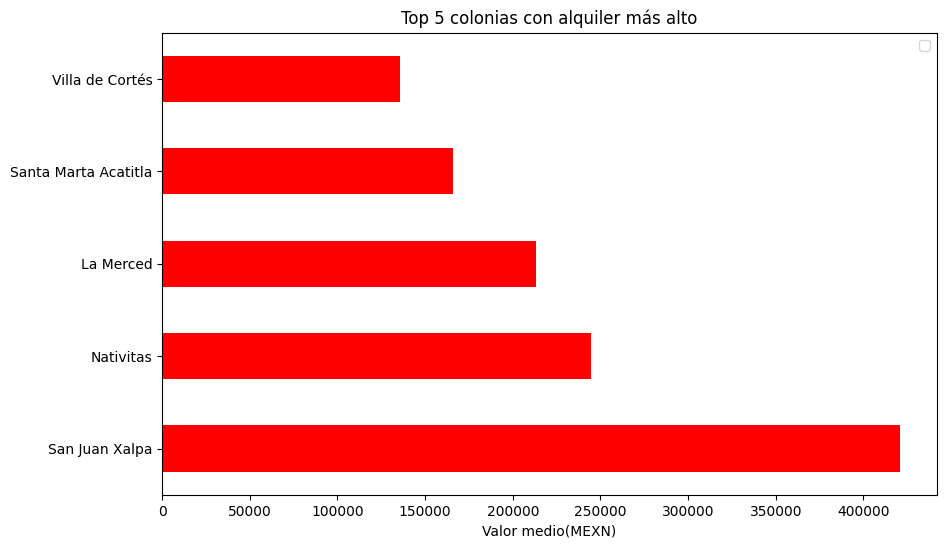

In [55]:
#Calcular el promedio de habitaciones por departamento.
eje_colonia = df_colonia_valor.plot(kind='barh', figsize=(10,6), title='Top 5 colonias con alquiler más alto', xlabel='Valor medio(MEXN)', color='red')
eje_colonia.set_ylabel('')
eje_colonia.legend('')

##Tratar valores nulos
Es importante que tratemos los datos faltantes, ya que los datos nulos no pueden utilizarse en el entrenamiento de modelos de ML.
* Verificar la existencia de datos nulos
* Tratar los datos nulos

###Verificar la existencia de datos nulos

In [56]:
#Se genera un dataframe que reemplaza los valores por True o False, dependiendo si hay datos faltantes.
datos_departamento.isnull()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,True,True
8,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
25111,False,False,False,False,False,False,False,False,False
25113,False,False,False,False,False,False,False,False,False
25114,False,False,False,False,False,False,False,False,False
25118,False,False,False,False,False,False,False,False,False


In [57]:
#Se genera una serie que suma los datos faltantes (cantidad de True) por columnas.
datos_departamento.isnull().sum()

,0
Tipo,0
Colonia,0
Habitaciones,0
Garages,0
Suites,0
Area,0
Valor,7
Condominio,493
Impuesto,3797


###Tratar los datos nulos
Dado que las 3 columnas con datos faltantes son numéricas, el equipo de machine learning solicitó reemplazar los datos faltantes por ceros.

In [58]:
datos_departamento_tratado = datos_departamento.fillna(0)
datos_departamento_tratado.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5


##Remover registros inconsistentes
El equipo de Machine Learning solicitó remover registros en la base de datos que no tienen mucho sentido, por ejemplo:

* Departamentos con un valor de alquiler igual a 0.

* Departamentos con un valor de condominio igual a 0.

In [59]:
#Se filtra el dataframe datos_departamento para obtener las filas con registros incosistentes.
datos_incosistentes = datos_departamento_tratado.query('Valor == 0 or Condominio == 0')

#Se obtienen los índices de los registros inconsistentes almacenados en un objeto de tipo "array_indices_inconsistentes".
indices_inconsistentes = datos_incosistentes.index

In [60]:
#Se eliminan las filas (axis=0) del dataframe "datos_departamento" con el método drop.
#Se emplea inplace para modificar el df original sin reasignarlo.
datos_departamento_tratado.drop(indices_inconsistentes, axis=0, inplace=True)
datos_departamento_tratado.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Departamento,Santa Fe,2,1,1,67,5950.0,2061.5,514.5


In [61]:
#Se elimina la columna "Tipo" (axis=1) del dataframe por contener un único valor y ser irrelevante.
datos_departamento_tratado.drop("Tipo", axis=1, inplace=True)
datos_departamento_tratado.head()

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Del Valle,1,0,0,48,2800.0,805.0,0.0
8,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Santa Fe,2,1,1,67,5950.0,2061.5,514.5


##Aplicar filtros
El equipo de ML desea evaluar solo propiedades en escenarios específicos, como:
* Apartamentos que tienen 1 dormitorio y un alquiler menor a MXN 4200.
* Apartamentos que tienen al menos 2 dormitorios, un alquiler menor a MXN 10500 y una superficie mayor a 70 m².

###Filtro 1: Apartamentos que tienen 1 dormitorio y un alquiler menor a MXN 4200.

In [67]:
#Creamos la máscara booleana con ambas condiciones.
mascara_1 = (datos_departamento_tratado["Habitaciones"]==1) & (datos_departamento_tratado["Valor"]<4200)

#Aplicamos la máscara booleana 1, y reasignamos el resultado a un nuevo dataframe.
datos_departamento_filtro1 = datos_departamento_tratado[mascara_1]
datos_departamento_filtro1.sample(5) #Para corroborar el filtro aplicado.

,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
9062,Roma,1,0,0,23,2975.0,2033.5,105.0
19418,Juárez,1,0,0,24,3850.0,1522.5,787.5
24069,San Rafael,1,1,0,60,3500.0,1400.0,73.5
2820,Ciudad de los Deportes,1,1,0,48,1575.0,962.5,0.0
21465,Bosques de las Lomas,1,0,0,37,2450.0,700.0,70.0


###Filtro 2: Apartamentos que tienen al menos 2 dormitorios, un alquiler menor a MXN 10500 y una superficie mayor a 70 m².

In [68]:
#Creamos la máscara booleana con ambas condiciones.
mascara_2 = (datos_departamento_tratado["Habitaciones"]>=2) & (datos_departamento_tratado["Valor"]<10500) & (datos_departamento_tratado["Area"]>70)

#Aplicamos la máscara booleana 1, y reasignamos el resultado a un nuevo dataframe.
datos_departamento_filtro2 = datos_departamento_tratado[mascara_2]
datos_departamento_filtro2.max() #Para corroborar el filtro aplicado.

,0
Colonia,Álvaro Obregón
Habitaciones,4
Garages,1960
Suites,4
Area,290
Valor,10465.0
Condominio,122139.5
Impuesto,87500.0


##Exportando los datos
Necesitamos almacenar nuestros dataframes en formato csv, manteniendo el separador original.

In [74]:
#¿Por qué establecer el índice en false? Porque sino, se exporta junto con los datos.
datos_departamento_tratado.to_csv("datos_tratados.csv",sep=";")
pd.read_csv("datos_tratados.csv", sep=";")

,Unnamed: 0,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,3,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
1,4,Del Valle,1,0,0,48,2800.0,805.0,0.0
2,8,Condesa,1,0,1,40,7000.0,1963.5,175.0
3,10,Condesa,4,3,1,243,45500.0,7000.0,2810.5
4,13,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
...,...,...,...,...,...,...,...,...,...
14259,25111,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
14260,25113,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
14261,25114,Narvarte,1,0,0,28,3500.0,1260.0,87.5
14262,25118,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


###Exportando los datos al directorio de Colab
Los archivos se guardan temporalmente. Al cerrar el cuaderno, se eliminan.

In [76]:
#Se exporta el dataframe tratado, ignorando los índices del df.
datos_departamento_tratado.to_csv("datos_tratados.csv", index = False, sep=";")

#Se exportan los 2 dataframe filtrados.
datos_departamento_filtro1.to_csv("datos_filtrados1.csv", index = False, sep=";")
datos_departamento_filtro2.to_csv("datos_filtrados2.csv", index = False, sep=";")

###Exportando los datos a Google Drive
Se debe montar Google Drive, antes de exportar los archivos.

In [77]:
#Montamos Google Drive en GColab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
#En lugar del nombre, especificamos la ruta donde guardaremos los archivos.
datos_departamento_tratado.to_csv("/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/2-pandas-conociendo-la-biblioteca/datos_tratados.csv", index=False, sep=";")
datos_departamento_filtro1.to_csv("/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/2-pandas-conociendo-la-biblioteca/datos_filtrados1.csv", index=False, sep=";")
datos_departamento_filtro2.to_csv("/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/2-pandas-conociendo-la-biblioteca/datos_filtrados2.csv", index=False, sep=";")

##Desafío del aula 3
Basándonos en los datos de alumnos importados en el desafío 1, resolvamos los problemas propuestos a continuación utilizando los conocimientos adquiridos hasta ahora.

* Verifica si la base de datos contiene datos nulos y, en caso de tenerlos, realiza el tratamiento de estos datos nulos de la manera que consideres más coherente con la situación.

* Los estudiantes "Alicia" y "Carlos" ya no forman parte del grupo. Por lo tanto, elimínalos de la base de datos.

* Aplica un filtro que seleccione solo a los estudiantes que fueron aprobados.

* Guarda el DataFrame que contiene solo a los estudiantes aprobados en un archivo CSV llamado "alumnos_aprobados.csv".

* Extra: Al revisar las calificaciones de los estudiantes aprobados, notamos que algunas calificaciones eran incorrectas. Las estudiantes que obtuvieron una calificación de 7.0, en realidad tenían un punto extra que no se contabilizó. Por lo tanto, reemplaza las calificaciones de 7.0 en la base de datos por 8.0. Consejo: busca el método replace.

###1. Tratamiento de datos nulos

In [85]:
#Contabilizamos los datos nulos en el dataframe proyecto.
proyecto.isnull().sum()

,0
Nombre,0
Edad,0
Nota,6
Aprobado,0


In [89]:
#Considerando que solo la columna Nota tiene datos nulos. Se reemplazarán con "0".
proyecto["Nota"]=proyecto.Nota.fillna(0)

#Corroboramos el tratamiento de datos nulos.
proyecto.isnull().sum()

,0
Nombre,0
Edad,0
Nota,0
Aprobado,0


###2. Eliminación de registros inválidos

In [94]:
#Se almacena en un array los índices correspondientes a los estudiantes Alicia y Carlos.
indices_estudiantes_invalidos = proyecto.query('Nombre == "Alicia" or Nombre == "Carlos"').index
indices_estudiantes_invalidos

Index([7, 8], dtype='int64')

In [95]:
#Se empleó el método drop para eliminar los estudiantes inválidos.
proyecto.drop(indices_estudiantes_invalidos,axis=0,inplace=True)
proyecto

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,0.0,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,0.0,False
6,Daniela,21,7.0,True
9,Victor,28,0.0,False
10,Danilo,21,0.0,False
11,Ignacio,24,4.5,False


###3. Filtrado de datos

In [105]:
#Creamos una máscara booleana que filtra valores con "True" en la columna Aprobado.
mascara_proyecto = proyecto["Aprobado"] == "True"

#Asignamos los resultados filtrados a un nuevo dataframe.
proyecto_aprobados = proyecto[mascara_proyecto].copy()
proyecto_aprobados

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
4,Brian,21,10.0,True
6,Daniela,21,7.0,True
12,Stephany,26,10.0,True
13,Miriam,25,9.0,True
15,Milena,29,7.0,True


###4. Exportación de datos

In [100]:
#Exportamos los datos, separados por comas, sin el índice y al directorio de GDrive.
proyecto_aprobados.to_csv("/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/2-pandas-conociendo-la-biblioteca/proyecto_aprobados.csv", index=False)

###5.Reemplazo de datos

In [108]:
#Reemplazamos los registros que contengan un 7 de Nota por un 8.
proyecto_aprobados["Nota"]=proyecto_aprobados.Nota.replace(to_replace=7, value=8)
proyecto_aprobados

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
4,Brian,21,10.0,True
6,Daniela,21,8.0,True
12,Stephany,26,10.0,True
13,Miriam,25,9.0,True
15,Milena,29,8.0,True


##Crear columnas numéricas
El equipo de desarrollo del sitio web de la empresa solicitó la creación de dos nuevas columnas numéricas en nuestra base de datos. En el sitio web de las propiedades, desean presentar información más resumida en relación a los valores mensual y anual.

In [110]:
#Importamos nuevamente la totalidad de los datos.
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'
datos = pd.read_csv(url, sep=";")
datos.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


###Valor mensual
Esta columna debe contener los gastos mensuales de cada propiedad, incluyendo el alquiler y el condominio.

In [111]:
#Calculamos el valor mensual.
datos["Valor mensual"] = datos.Valor + datos.Condominio

###Valor anual
Esta columna debe contener los gastos anuales por propiedad, es decir, el Impuesto más 12 meses de alquiler y condominio.

In [112]:
#Calculamos el valor anual.
datos["Valor anual"] = (datos["Valor mensual"])*12 + datos.Impuesto
datos.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor mensual,Valor anual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN


##Crear columnas categóricas
El equipo de desarrollo solicitó la creación de dos columnas adicionales. Sin embargo, esta vez son categóricas:
* Descripción
* Tiene suite

###Descripción
Esta columna debe contener un resumen de la información clave de las propiedades que se mostrarán en el sitio web: tipo de propiedad, barrio, cantidad de habitaciones y plazas de estacionamiento.

In [120]:
#Se concatenaron los textos solicitados en la columna Descripcion.
datos['Descripcion'] = datos['Tipo'] + ' en la colonia ' + datos['Colonia'] + \
                        ' con ' + datos['Habitaciones'].astype(str) + ' cuarto(s) y ' + \
                        datos['Garages'].astype(str) + ' plazas de estacionamiento.'

In [121]:
#Se comprueba si la fila 500 contiene la descripción correcta, a modo de prueba.
datos.iloc[500]['Descripcion']

'Departamento en la colonia Napoles con 1 cuarto(s) y 0 plazas de estacionamiento.'

###Tiene suite
Esta debe ser una columna que indique únicamente si la propiedad tiene o no suites, sin importar la cantidad

In [130]:
#Se crea la columna "Tiene_suite", y mediante una función lambda asignamos valores dependiendo del valor en "Suites".
datos['Tiene_suite'] = datos['Suites'].apply(lambda x: "Si" if x>0 else "No")
#datos['Tiene_suite'] = datos['Suites'].apply(lambda x: "Si" if datos['Suites'][x]>0 else "No")
datos.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor mensual,Valor anual,Descripcion,Tiene_suite
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en la colonia Condesa con 1 cuarto(s)...,No
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en la colonia Polanco con 2 cuarto(s) y 0...,Si
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en la colonia Santa Fe...,No
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0,Departamento en la colonia Centro Histórico co...,No
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en la colonia Del Valle con 1 cua...,No


###Exportación de datos solicitados por el equipo de desarrollo web

In [131]:
#Exportamos los datos a un csv en Google Drive.
datos.to_csv("/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/2-pandas-conociendo-la-biblioteca/datos_web.csv", index=False, sep=";")

##Desafío del aula 4
Con base al dataframe de estudiantes, resolvamos los problemas propuestos a continuación:

1. Los estudiantes participaron en una actividad extracurricular y ganaron puntos extras. Estos puntos extras corresponden al 40% de su nota actual. Por lo tanto, crea una columna llamada "Puntos_extras" que contenga los puntos extras de cada estudiante, es decir, el 40% de su nota actual.

2. Crea otra columna llamada "Notas_finales" que contenga las notas de cada estudiante sumadas con los puntos extras.

3. Dado que hubo una puntuación extra, algunos estudiantes que no habían sido aprobados antes pueden haber sido aprobados ahora. En función de esto, crea una columna llamada "Aprobado_final" con los siguientes valores:

  * True: si el estudiante está aprobado (la nota final debe ser mayor o igual a 7.0).
  * False: si el estudiante está reprobado (la nota final debe ser menor que 7.0).
4. Realiza una selección y verifica qué estudiantes no habían sido aprobados anteriormente, pero ahora fueron aprobados después de sumar los puntos extras.

In [185]:
#Importamos nuevamente el archivo csv
url_proyecto = 'https://gist.githubusercontent.com/ahcamachod/807a2c1cf6c19108b2b701ea1791ab45/raw/fb84f8b2d8917a89de26679eccdbc8f9c1d2e933/alumnos.csv'

proyecto = pd.read_csv(url_proyecto)

###Columna "Puntos_extras"

In [186]:
#Se crea la columna numérica "Puntos_extras"
proyecto['Puntos_extras'] = 0.4*proyecto['Nota']
proyecto.head()

,Nombre,Edad,Nota,Aprobado,Puntos_extras
0,Alberto,20,7.5,True,3.0
1,Ana,18,NaN,False,NaN
2,Camila,27,2.5,False,1.0
3,David,18,5.0,False,2.0
4,Brian,21,10.0,True,4.0


###Tratamiento de datos nulos y registros inválidos

In [187]:
#Se observan 6 registros con datos nulos.
proyecto.isnull().sum()

,0
Nombre,0
Edad,0
Nota,6
Aprobado,0
Puntos_extras,6


In [188]:
#Se reemplaza por cero los registros sin datos en Nota, y por 4 los registros sin datos en Puntos_extras.
proyecto['Nota'] = proyecto.Nota.fillna(0)
proyecto['Puntos_extras'] = proyecto.Puntos_extras.fillna(4)

#Comprobamos que no hayan más registros sin datos.
proyecto.isnull().sum()

,0
Nombre,0
Edad,0
Nota,0
Aprobado,0
Puntos_extras,0


In [189]:
#Se muestran los valores únicos en la columna Aprobado.
proyecto['Aprobado'].unique()

array(['True', 'False', 'Verdadero'], dtype=object)

In [190]:
#Se localiza el índice del registro que contiene "Verdadero" en lugar de "True" para la columna Aprobado.
mascara = proyecto['Aprobado'] == "Verdadero"
proyecto[mascara]

,Nombre,Edad,Nota,Aprobado,Puntos_extras
17,Nadia,34,8.0,Verdadero,3.2


In [191]:
#Se reemplaza "verdadero" por "True" con replace.
proyecto.replace(to_replace="Verdadero", value="True", inplace=True)
proyecto.iloc[17]

,17
Nombre,Nadia
Edad,34
Nota,8.0
Aprobado,True
Puntos_extras,3.2


###Columna "Notas_finales"

In [192]:
#Se crea la columna numérica "Notas_finales".
proyecto['Notas_finales'] = proyecto['Nota'] + proyecto['Puntos_extras']
proyecto.head()

,Nombre,Edad,Nota,Aprobado,Puntos_extras,Notas_finales
0,Alberto,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,4.0,4.0
2,Camila,27,2.5,False,1.0,3.5
3,David,18,5.0,False,2.0,7.0
4,Brian,21,10.0,True,4.0,14.0


###Columna "Aprobado_final"

In [199]:
#Se crea la columna categórica "Aprobado_final" a partir de las Notas finales (siendo 7 el mínimo para aprobar).
proyecto['Aprobado_final'] = proyecto['Notas_finales'].apply(lambda x: False if x<7 else True) #Se estable como valores bool, no str.
proyecto.head()

,Nombre,Edad,Nota,Aprobado,Puntos_extras,Notas_finales,Aprobado_final
0,Alberto,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,4.0,4.0,False
2,Camila,27,2.5,False,1.0,3.5,False
3,David,18,5.0,False,2.0,7.0,True
4,Brian,21,10.0,True,4.0,14.0,True


###Nuevos aprobados

In [200]:
#Se crea una lista con los índices correspondientes a los aprobados primigenios.
indice_aprobados_inicial = proyecto.query('Aprobado == "True"').index #Los valores de la columna Aprobado son str, no bool. Por eso van en comillas.

#Se quitan los aprobados inicial con el método drop, y asigna el resultado a un nuevo dataframe.
proyecto_sin_aprobadosinicial = proyecto.drop(indice_aprobados_inicial, axis = 0)

#Se genera una copia de la vista del nuevo dataframe donde se muestre únicamente a los nuevos aprobados.
nuevos_aprobados = proyecto_sin_aprobadosinicial.query('Aprobado_final == True') #True va sin comillas porque en lambda se establecieron como bool, no como str.
nuevos_aprobados

,Nombre,Edad,Nota,Aprobado,Puntos_extras,Notas_finales,Aprobado_final
3,David,18,5.0,False,2.00,7.00,True
7,Carlos,19,6.0,False,2.40,8.40,True
8,Alicia,35,5.6,False,2.24,7.84,True


In [204]:
#Solución alternativa 1 propuesta por el docente, usando máscaras booleanas.
proyecto.query('Aprobado == "False" & Aprobado_final == True')

,Nombre,Edad,Nota,Aprobado,Puntos_extras,Notas_finales,Aprobado_final
3,David,18,5.0,False,2.00,7.00,True
7,Carlos,19,6.0,False,2.40,8.40,True
8,Alicia,35,5.6,False,2.24,7.84,True


In [205]:
#Solución alternativa 2 propuesta por el docente, usando máscaras booleanas.
seleccion = (proyecto['Aprobado'] == "False") & (proyecto['Aprobado_final'] == True)
proyecto[seleccion]

,Nombre,Edad,Nota,Aprobado,Puntos_extras,Notas_finales,Aprobado_final
3,David,18,5.0,False,2.00,7.00,True
7,Carlos,19,6.0,False,2.40,8.40,True
8,Alicia,35,5.6,False,2.24,7.84,True
